Import Libraries

In [1]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as k

Variables:
batch: the process of splitting the training dataset in n batches (mini-batches),
classes: number of classifications (labels) of the data,
epochs: variations, one epoch is one forward pass + one backward pass on training

In [2]:
batch_size = 20
num_classes = 10
epochs = 4

a function that returns audio in numeric representation

In [3]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    return wav

Check a sample of audio

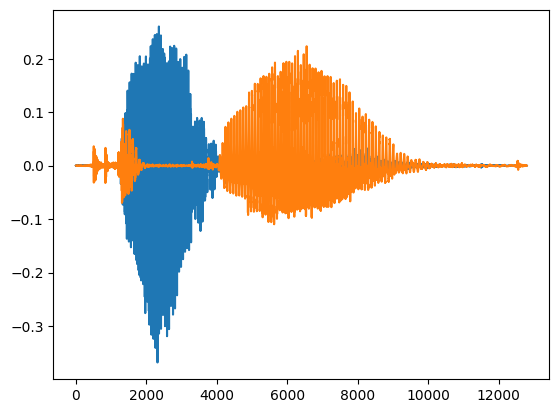

In [4]:
TRAIN_FILE = os.path.join('audio-data','Train','C03n_0.wav')
TEST_FILE = os.path.join('audio-data','Test','C04n_2.wav')
wave = load_wav_16k_mono(TRAIN_FILE)
nwave = load_wav_16k_mono(TEST_FILE)
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [5]:
TRAIN = os.path.join('audio-data', 'Train')
TEST = os.path.join('audio-data', 'Test')

Read all audio files and sort

In [6]:
train = tf.data.Dataset.list_files(TRAIN+'\*.wav')
train = sorted(list(train.as_numpy_iterator()))
train = tf.data.Dataset.from_tensor_slices(train)
test = tf.data.Dataset.list_files(TEST+'\*.wav')
test = sorted(list(test.as_numpy_iterator()))
test = tf.data.Dataset.from_tensor_slices(test)

Add Labels

In [125]:
iterations = 0
i = 0
while iterations!=len(train):
    iterations +=1
    train_label.append(i)
    i += 1
    if i == 10 :
        i = 0
trainings = tf.data.Dataset.zip((train, tf.data.Dataset.from_tensor_slices(train_label)))
#---------------------------------------------------------------#
iterations = 0
i = 0
y_test=[]
while iterations!=len(test):
    iterations +=1
    test_label.append(i)
    i += 1
    if i == 10 :
        i = 0
testings = tf.data.Dataset.zip((test, tf.data.Dataset.from_tensor_slices(tf.zeros(len(test_label)))))

Design the CNN architecture

In [ ]:
model=Sequential()

model.add( Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape) )
model.add( MaxPool2D(pool_size=(2,2)) )
model.add( Conv2D(64,kernel_size=(3,3),activation='relu') )
model.add( MaxPool2D(pool_size=(2,2)) )
model.add( Conv2D(64,kernel_size=(3,3),activation='relu') )
model.add( Flatten() )
model.add( Dense(32,activation='relu') )
model.add( Dense(num_classes,activation='softmax') )
model.summary()

Compile the model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy']
             )
model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test,y_test)
          )

Save the Model

In [ ]:
model.save('simpleCNNmodel_audio.h5')
print("model is saved")